In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [ ]:
data = pd.read_csv("listings.csv")
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,183319,https://www.airbnb.com/rooms/183319,20220909140055,2022-09-10,previous scrape,Panoramic Ocean View Venice Beach,Craftsmen style penthouse with ocean view from...,About as close to the beach as you can live in...,https://a0.muscache.com/pictures/1170205/e2596...,867995,...,5.00,5.00,5.00,NaN,f,2,2,0,0,0.02
1,51307,https://www.airbnb.com/rooms/51307,20220909140055,2022-09-10,city scrape,Spanish Bungalow Guest House LA CA. 30 plus ni...,PRIVATE GUEST HOUSE<br /><br /><b>The space</b...,"Local LA Community , shops and restaurants in...",https://a0.muscache.com/pictures/294658/ac8d6e...,235568,...,4.85,4.95,4.76,NaN,f,2,2,0,0,0.98
2,184314,https://www.airbnb.com/rooms/184314,20220909140055,2022-09-10,previous scrape,Boho Chic Flat..Steps to Beach!,"Bright, airy, quiet 1 bdr located just steps f...",You are in one of the beach locations in Los A...,https://a0.muscache.com/pictures/0bc2f8b7-9378...,884031,...,4.93,4.89,4.85,NaN,t,1,1,0,0,0.22
3,51498,https://www.airbnb.com/rooms/51498,20220909140055,2022-09-10,city scrape,Guest House With Its Own Entrance/Exit and Hot...,"Fully self-contained, separate structure, with...",We are close to Venice without the hassle of n...,https://a0.muscache.com/pictures/83426633/c9e3...,236758,...,4.90,4.83,4.74,HSR19-001336,f,1,1,0,0,2.60
4,109,https://www.airbnb.com/rooms/109,20220909140055,2022-09-10,city scrape,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45810,26665862,https://www.airbnb.com/rooms/26665862,20220909140055,2022-09-10,previous scrape,"Queen Bed, Foam Mattress",Queen bed with a soft foam mattress in a priva...,"-Near Fairview Regional Park with hiking, biki...",https://a0.muscache.com/pictures/2b23e74c-89da...,82712887,...,4.94,4.88,4.83,NaN,f,2,0,2,0,2.15
45811,26898605,https://www.airbnb.com/rooms/26898605,20220909140055,2022-09-10,previous scrape,*SANITIZED* Modern Zen Getaway | Relax & Reple...,Are you more than ready for a Local Getaway?<b...,We are conveniently located just minutes from ...,https://a0.muscache.com/pictures/miso/Hosting-...,202090530,...,4.89,4.89,4.79,NaN,f,4,4,0,0,2.83
45812,26895703,https://www.airbnb.com/rooms/26895703,20220909140055,2022-09-10,previous scrape,"Simple, Clean, Modern One Bedroom Apartment",Welcome to Anaheim! This one bedroom suite ha...,We are in a safe and happy area. The street m...,https://a0.muscache.com/pictures/c6916de2-84f8...,47063020,...,4.89,4.65,4.69,Exempt,t,12,12,0,0,4.13
45813,26954426,https://www.airbnb.com/rooms/26954426,20220909140055,2022-09-10,previous scrape,Oak Park House,"Good location, new carpet, kitchen and floorin...","Close to Brookside elementary, Medea creek and...",https://a0.muscache.com/pictures/7d35579e-9e8b...,43312170,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.04


In [ ]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

<h2>Filtering out listings from City of LA

In [ ]:
data['neighbourhood_group_cleansed'].unique()

array(['City of Los Angeles', 'Other Cities', 'Unincorporated Areas', nan],
      dtype=object)

In [ ]:
data = data[data['neighbourhood_group_cleansed'] == 'City of Los Angeles']
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,183319,https://www.airbnb.com/rooms/183319,20220909140055,2022-09-10,previous scrape,Panoramic Ocean View Venice Beach,Craftsmen style penthouse with ocean view from...,About as close to the beach as you can live in...,https://a0.muscache.com/pictures/1170205/e2596...,867995,...,5.00,5.00,5.00,NaN,f,2,2,0,0,0.02
1,51307,https://www.airbnb.com/rooms/51307,20220909140055,2022-09-10,city scrape,Spanish Bungalow Guest House LA CA. 30 plus ni...,PRIVATE GUEST HOUSE<br /><br /><b>The space</b...,"Local LA Community , shops and restaurants in...",https://a0.muscache.com/pictures/294658/ac8d6e...,235568,...,4.85,4.95,4.76,NaN,f,2,2,0,0,0.98
2,184314,https://www.airbnb.com/rooms/184314,20220909140055,2022-09-10,previous scrape,Boho Chic Flat..Steps to Beach!,"Bright, airy, quiet 1 bdr located just steps f...",You are in one of the beach locations in Los A...,https://a0.muscache.com/pictures/0bc2f8b7-9378...,884031,...,4.93,4.89,4.85,NaN,t,1,1,0,0,0.22
3,51498,https://www.airbnb.com/rooms/51498,20220909140055,2022-09-10,city scrape,Guest House With Its Own Entrance/Exit and Hot...,"Fully self-contained, separate structure, with...",We are close to Venice without the hassle of n...,https://a0.muscache.com/pictures/83426633/c9e3...,236758,...,4.90,4.83,4.74,HSR19-001336,f,1,1,0,0,2.60
5,185536,https://www.airbnb.com/rooms/185536,20220909140055,2022-09-09,city scrape,Lovely Private rm in Home to FEMALE (Red Room),"<b>The space</b><br />Hello,, Ladies!!! I offe...",NaN,https://a0.muscache.com/pictures/1773782/b2ea4...,890778,...,4.85,4.77,4.38,NaN,f,2,0,2,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44539,52124367,https://www.airbnb.com/rooms/52124367,20220909140055,2022-09-10,city scrape,Magnificent Beach Penthouse,"Grand 2,600 square foot dog friendly contempor...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,21942371,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
44863,47218464,https://www.airbnb.com/rooms/47218464,20220909140055,2022-09-10,city scrape,House overlooking the Marina with stunning views!,Beautiful beach house located at the Del Rey L...,The Ballona Creek Bridge will take you directl...,https://a0.muscache.com/pictures/5beacc7a-d6c1...,218130018,...,5.00,5.00,4.00,NaN,f,1,0,1,0,0.05
44928,611644219965521388,https://www.airbnb.com/rooms/611644219965521388,20220909140055,2022-09-10,city scrape,Cute Beach house w/patio steps to beach.,Perfect location steps to the beach and board ...,Venice beach<br />Venice boardwalk<br />Abbott...,https://a0.muscache.com/pictures/84d396b7-3bf9...,31484173,...,4.97,4.93,4.90,NaN,f,2,2,0,0,7.13
45078,663998246296163023,https://www.airbnb.com/rooms/663998246296163023,20220909140055,2022-09-10,city scrape,Cute Venice Beach house (B),Steps to the beach. 2 blocks to Abbott Kinney....,Venice beach <br />Venice boardwalk<br />Abbot...,https://a0.muscache.com/pictures/0352f051-a65c...,31484173,...,4.85,4.92,4.92,NaN,t,2,2,0,0,6.72


<h2>Dropping descriptive columns

In [ ]:
data = data.drop(['id', 'listing_url',  'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about','host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood','host_has_profile_pic','property_type', 'first_review', 'last_review'], axis = 1)

In [ ]:
data

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,within a day,100%,100%,f,2.0,3.0,"['email', 'phone']",f,"Los Angeles, California, United States",Venice,...,5.00,5.00,5.00,NaN,f,2,2,0,0,0.02
1,NaN,NaN,NaN,f,2.0,2.0,"['email', 'phone']",t,"Los Angeles, California, United States",Atwater Village,...,4.85,4.95,4.76,NaN,f,2,2,0,0,0.98
2,NaN,NaN,NaN,f,2.0,2.0,"['email', 'phone', 'work_email']",t,"Marina del Rey, California, United States",Venice,...,4.93,4.89,4.85,NaN,t,1,1,0,0,0.22
3,within an hour,100%,88%,f,1.0,2.0,"['email', 'phone']",t,"Los Angeles, California, United States",Mar Vista,...,4.90,4.83,4.74,HSR19-001336,f,1,1,0,0,2.60
5,within a few hours,100%,80%,f,2.0,2.0,"['email', 'phone']",t,NaN,Westchester,...,4.85,4.77,4.38,NaN,f,2,0,2,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44539,within an hour,100%,100%,t,2.0,2.0,"['email', 'phone']",t,NaN,Venice,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
44863,within an hour,100%,100%,f,1.0,4.0,"['email', 'phone']",t,"Marina del Rey, California, United States",Venice,...,5.00,5.00,4.00,NaN,f,1,0,1,0,0.05
44928,within an hour,100%,99%,f,2.0,3.0,"['email', 'phone']",t,"Los Angeles, California, United States",Venice,...,4.97,4.93,4.90,NaN,f,2,2,0,0,7.13
45078,within an hour,100%,99%,f,2.0,3.0,"['email', 'phone']",t,"Los Angeles, California, United States",Venice,...,4.85,4.92,4.92,NaN,t,2,2,0,0,6.72


<h2>Dealing with null values</h2>
<p>drop column if more than 30% of it is null</p>

In [ ]:
data.isna().sum()

host_response_time                               4984
host_response_rate                               4984
host_acceptance_rate                             4604
host_is_superhost                                  52
host_listings_count                                 2
host_total_listings_count                           2
host_verifications                                  0
host_identity_verified                              2
neighbourhood                                    7769
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                                           0
room_type                                           0
accommodates                                        0
bathrooms                                       19501
bathrooms_text                                     44
bedrooms                                         2197
beds                        

In [ ]:
for column in data.columns:
    if data[column].isna().sum() >= len(data[column])*0.3:
        print(column)

neighbourhood
bathrooms
calendar_updated
license


In [ ]:
data = data.drop(['neighbourhood','bathrooms','calendar_updated','license'], axis=1)


In [ ]:
data = data.reset_index()
data

,index,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,within a day,100%,100%,f,2.0,3.0,"['email', 'phone']",f,Venice,...,5.00,5.00,5.00,5.00,f,2,2,0,0,0.02
1,1,NaN,NaN,NaN,f,2.0,2.0,"['email', 'phone']",t,Atwater Village,...,4.89,4.85,4.95,4.76,f,2,2,0,0,0.98
2,2,NaN,NaN,NaN,f,2.0,2.0,"['email', 'phone', 'work_email']",t,Venice,...,4.78,4.93,4.89,4.85,t,1,1,0,0,0.22
3,3,within an hour,100%,88%,f,1.0,2.0,"['email', 'phone']",t,Mar Vista,...,4.94,4.90,4.83,4.74,f,1,1,0,0,2.60
4,5,within a few hours,100%,80%,f,2.0,2.0,"['email', 'phone']",t,Westchester,...,4.77,4.85,4.77,4.38,f,2,0,2,0,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19496,44539,within an hour,100%,100%,t,2.0,2.0,"['email', 'phone']",t,Venice,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
19497,44863,within an hour,100%,100%,f,1.0,4.0,"['email', 'phone']",t,Venice,...,5.00,5.00,5.00,4.00,f,1,0,1,0,0.05
19498,44928,within an hour,100%,99%,f,2.0,3.0,"['email', 'phone']",t,Venice,...,4.93,4.97,4.93,4.90,f,2,2,0,0,7.13
19499,45078,within an hour,100%,99%,f,2.0,3.0,"['email', 'phone']",t,Venice,...,4.85,4.85,4.92,4.92,t,2,2,0,0,6.72


In [ ]:
data.isna().sum()

index                                              0
host_response_time                              4984
host_response_rate                              4984
host_acceptance_rate                            4604
host_is_superhost                                 52
host_listings_count                                2
host_total_listings_count                          2
host_verifications                                 0
host_identity_verified                             2
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
room_type                                          0
accommodates                                       0
bathrooms_text                                    44
bedrooms                                        2197
beds                                             452
amenities                                     

In [ ]:
data.price = data.price.map(lambda x: float(x[1::].replace(',','')))

<h3>Reviews</h3>

In [ ]:
rating = data['review_scores_rating'].fillna(0)
accuracy = data['review_scores_accuracy'].fillna(0)
cleanliness = data['review_scores_cleanliness'].fillna(0)
checkin = data['review_scores_checkin'].fillna(0)
communication = data['review_scores_communication'].fillna(0)
location = data['review_scores_location'].fillna(0)
value = data['review_scores_value'].fillna(0)

review = []

len(value)

19501

In [ ]:
for i in range(len(data)):
    count = 0
    avg = 0
    if rating[i] != 0:
        count += 1
        avg += rating[i]
    if accuracy[i] != 0:
        count += 1
        avg += accuracy[i]
    if cleanliness[i] != 0:
        count += 1
        avg += cleanliness[i]
    if checkin[i] != 0:
        count += 1
        avg += checkin[i]
    if communication[i] != 0:
        count += 1
        avg += communication[i]
    if location[i] != 0:
        count += 1
        avg += location[i]
    if value[i] != 0:
        count += 1
        avg += value[i]
    if count == 0:
        review.append(0)
    else:
        review.append(round(avg/count, 2))
data['overall_review'] = review
data = data.drop(['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'], axis = 1)

In [ ]:
imputer = SimpleImputer(missing_values = 0, strategy ='mean')
data['overall_review'] = imputer.fit_transform(data['overall_review'].values.reshape(-1,1))
data['beds']=data['beds'].fillna(data['beds'].median())
data['bedrooms']=data['bedrooms'].fillna(data['bedrooms'].median())
# imputer.transform(data['overall_review'])
data


,index,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,overall_review
0,0,within a day,100%,100%,f,2.0,3.0,"['email', 'phone']",f,Venice,...,3,0,0,f,2,2,0,0,0.02,4.91000
1,1,NaN,NaN,NaN,f,2.0,2.0,"['email', 'phone']",t,Atwater Village,...,138,0,0,f,2,2,0,0,0.98,4.77000
2,2,NaN,NaN,NaN,f,2.0,2.0,"['email', 'phone', 'work_email']",t,Venice,...,30,0,0,t,1,1,0,0,0.22,4.84000
3,3,within an hour,100%,88%,f,1.0,2.0,"['email', 'phone']",t,Mar Vista,...,378,41,2,f,1,1,0,0,2.60,4.82000
4,5,within a few hours,100%,80%,f,2.0,2.0,"['email', 'phone']",t,Westchester,...,13,1,0,f,2,0,2,0,0.10,4.48000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19496,44539,within an hour,100%,100%,t,2.0,2.0,"['email', 'phone']",t,Venice,...,0,0,0,f,2,2,0,0,NaN,4.75739
19497,44863,within an hour,100%,100%,f,1.0,4.0,"['email', 'phone']",t,Venice,...,1,0,0,f,1,0,1,0,0.05,4.86000
19498,44928,within an hour,100%,99%,f,2.0,3.0,"['email', 'phone']",t,Venice,...,29,29,8,f,2,2,0,0,7.13,4.92000
19499,45078,within an hour,100%,99%,f,2.0,3.0,"['email', 'phone']",t,Venice,...,13,13,5,t,2,2,0,0,6.72,4.87000


In [ ]:
data['host_response_time'].unique()

array(['within a day', nan, 'within an hour', 'within a few hours',
       'a few days or more'], dtype=object)

<h3>Replacing amenities with its count </h3>

In [ ]:
amenities = data['amenities']
amenities_count =[]
for ele in amenities:
    ele = len(ele.split(','))
    amenities_count.append(ele)
data['amenities'] = amenities_count

In [ ]:
data['amenities']

0        22
1        30
2        18
3        44
4        29
         ..
19496    61
19497    17
19498    68
19499    66
19500    44
Name: amenities, Length: 19501, dtype: int64

In [ ]:
data['beds']=data['beds'].fillna(data['beds'].median())
data['bedrooms']=data['bedrooms'].fillna(data['bedrooms'].median())

<h3>Dropped bathroom text later</h3>

In [ ]:
data['bathrooms_text'].unique()

array(['1 bath', '1 shared bath', '2.5 baths', '1 private bath',
       '1.5 baths', '2 baths', '3 baths', nan, '2 shared baths',
       '1.5 shared baths', '11 shared baths', '4 baths', '8 shared baths',
       '8 baths', '0 shared baths', '8.5 shared baths', '3.5 baths',
       '3.5 shared baths', '5 baths', '0 baths', '4.5 baths',
       '2.5 shared baths', '3 shared baths', '11.5 shared baths',
       '6.5 baths', '4.5 shared baths', 'Shared half-bath', '8.5 baths',
       '7.5 baths', 'Half-bath', '5.5 baths', '5 shared baths', '6 baths',
       '7 baths', '9 baths', '4 shared baths', '12.5 baths', '9.5 baths',
       '10 baths', 'Private half-bath', '11.5 baths', '13 baths',
       '11 baths', '13.5 baths', '25 baths', '12 baths', '10.5 baths',
       '21 baths', '15 baths'], dtype=object)

In [ ]:
b = []

btest = data[data['bathrooms_text'].notna()]
btest.reset_index()

,level_0,index,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,overall_review
0,0,0,within a day,100%,100%,f,2.0,3.0,"['email', 'phone']",f,...,3,0,0,f,2,2,0,0,0.02,4.91000
1,1,1,NaN,NaN,NaN,f,2.0,2.0,"['email', 'phone']",t,...,138,0,0,f,2,2,0,0,0.98,4.77000
2,2,2,NaN,NaN,NaN,f,2.0,2.0,"['email', 'phone', 'work_email']",t,...,30,0,0,t,1,1,0,0,0.22,4.84000
3,3,3,within an hour,100%,88%,f,1.0,2.0,"['email', 'phone']",t,...,378,41,2,f,1,1,0,0,2.60,4.82000
4,4,5,within a few hours,100%,80%,f,2.0,2.0,"['email', 'phone']",t,...,13,1,0,f,2,0,2,0,0.10,4.48000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,19496,44539,within an hour,100%,100%,t,2.0,2.0,"['email', 'phone']",t,...,0,0,0,f,2,2,0,0,NaN,4.75739
19453,19497,44863,within an hour,100%,100%,f,1.0,4.0,"['email', 'phone']",t,...,1,0,0,f,1,0,1,0,0.05,4.86000
19454,19498,44928,within an hour,100%,99%,f,2.0,3.0,"['email', 'phone']",t,...,29,29,8,f,2,2,0,0,7.13,4.92000
19455,19499,45078,within an hour,100%,99%,f,2.0,3.0,"['email', 'phone']",t,...,13,13,5,t,2,2,0,0,6.72,4.87000


In [ ]:

# # data['bathrooms_text'].values[5555].split()
# for ele in btest['bathrooms_text'].values:
#     if ele.strip() == 'Private' or ele.strip() == 'Shared half-bath' or ele.strip() == 'Half-bath' or ele.strip() == 'Shared':
#         print(ele)
#         b.append(0.5)
#     else:
# #         print(ele)
#         b.append(float(ele.split()[0]))

# len(btest)
# # btest['bathrooms_text'].unique()
# # btest['price'].corr(btest['bathrooms_text'])
def split(x):
    x = str(x)
    x = x.split()[0]
    if x == "Half-bath" or x == "Shared":
        x = 0.5
    elif x == "Private":
        x = 1
    return float(x)
data['no_bathrooms'] = data['bathrooms_text'].apply(split)
data

,index,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,...,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,overall_review,no_bathrooms
0,0,within a day,100%,100%,f,2.0,3.0,"['email', 'phone']",f,Venice,...,0,0,f,2,2,0,0,0.02,4.91000,1.0
1,1,NaN,NaN,NaN,f,2.0,2.0,"['email', 'phone']",t,Atwater Village,...,0,0,f,2,2,0,0,0.98,4.77000,1.0
2,2,NaN,NaN,NaN,f,2.0,2.0,"['email', 'phone', 'work_email']",t,Venice,...,0,0,t,1,1,0,0,0.22,4.84000,1.0
3,3,within an hour,100%,88%,f,1.0,2.0,"['email', 'phone']",t,Mar Vista,...,41,2,f,1,1,0,0,2.60,4.82000,1.0
4,5,within a few hours,100%,80%,f,2.0,2.0,"['email', 'phone']",t,Westchester,...,1,0,f,2,0,2,0,0.10,4.48000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19496,44539,within an hour,100%,100%,t,2.0,2.0,"['email', 'phone']",t,Venice,...,0,0,f,2,2,0,0,NaN,4.75739,2.0
19497,44863,within an hour,100%,100%,f,1.0,4.0,"['email', 'phone']",t,Venice,...,0,0,f,1,0,1,0,0.05,4.86000,1.0
19498,44928,within an hour,100%,99%,f,2.0,3.0,"['email', 'phone']",t,Venice,...,29,8,f,2,2,0,0,7.13,4.92000,1.0
19499,45078,within an hour,100%,99%,f,2.0,3.0,"['email', 'phone']",t,Venice,...,13,5,t,2,2,0,0,6.72,4.87000,1.0


In [ ]:
data.corr()

,index,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,amenities,price,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,overall_review,no_bathrooms
index,1.000000,0.141194,0.150732,0.050022,-0.033554,0.169539,0.154160,0.121508,0.145217,0.072579,...,-0.382422,-0.068934,0.021113,0.191487,0.144564,0.138789,0.024185,0.120082,-0.076936,0.138360
host_listings_count,0.141194,1.000000,0.986506,0.001694,-0.008844,-0.076023,-0.062853,-0.088869,-0.006870,-0.027558,...,-0.087478,-0.068570,-0.069194,0.927687,0.979606,0.039333,-0.014366,-0.080097,-0.054157,-0.040698
host_total_listings_count,0.150732,0.986506,1.000000,-0.000985,-0.008839,-0.071102,-0.060939,-0.086331,-0.011939,-0.024724,...,-0.091012,-0.070239,-0.070453,0.903294,0.954253,0.037083,-0.011697,-0.083228,-0.059971,-0.040349
latitude,0.050022,0.001694,-0.000985,1.000000,-0.250431,0.088078,0.077089,0.066704,0.096579,0.038007,...,-0.045899,-0.017981,-0.015137,0.056192,-0.006809,0.164257,-0.071000,-0.019249,0.038055,0.071483
longitude,-0.033554,-0.008844,-0.008839,-0.250431,1.000000,-0.129098,-0.144028,-0.120455,-0.125655,-0.085771,...,0.023014,0.015828,0.005906,-0.046699,-0.003038,-0.118725,0.079347,0.020752,-0.057739,-0.088630
accommodates,0.169539,-0.076023,-0.071102,0.088078,-0.129098,1.000000,0.840539,0.815458,0.254562,0.440899,...,-0.049586,0.023470,0.050713,-0.071178,-0.061836,-0.022531,-0.095583,0.085322,0.005056,0.599607
bedrooms,0.154160,-0.062853,-0.060939,0.077089,-0.144028,0.840539,1.000000,0.795976,0.220165,0.507331,...,-0.083836,-0.002907,0.025039,-0.083701,-0.046450,-0.093186,-0.063888,0.029833,0.025752,0.695557
beds,0.121508,-0.088869,-0.086331,0.066704,-0.120455,0.815458,0.795976,1.000000,0.242652,0.384538,...,-0.046982,0.020227,0.041668,-0.083690,-0.082856,-0.015560,-0.006000,0.059531,0.011554,0.585150
amenities,0.145217,-0.006870,-0.011939,0.096579,-0.125655,0.254562,0.220165,0.242652,1.000000,0.080786,...,0.089655,0.167074,0.192437,0.062414,-0.028607,0.230974,-0.075832,0.202048,0.135469,0.159258
price,0.072579,-0.027558,-0.024724,0.038007,-0.085771,0.440899,0.507331,0.384538,0.080786,1.000000,...,-0.055958,-0.017128,-0.012567,-0.036923,-0.017560,-0.046402,-0.042404,0.001895,0.017528,0.509938


In [ ]:
data['availability_30'].corr(data['availability_90'])

0.8794962242110189

<h2>Multiple regression</h2>

In [ ]:
# data1 = data.copy()
# room = pd.get_dummies(data1['room_type'], prefix='room_type')
# room
# data1['room_type_Entire home/apt'] = room['room_type_Entire home/apt']
# data1['room_type_Hotel room'] = room['room_type_Hotel room']
# data1['room_type_Private room'] = room['room_type_Private room']
# data1['room_type_Shared room'] = room['room_type_Shared room']
# # data1 = data1.drop(['room_type'], axis = 1)
# data1['instant_bookable'] = data1['instant_bookable'].map(lambda x : 0 if x == 'f' else 1)
# data1


In [ ]:
rr =data[data['price'] != 0.0]
rr
rr['no_bathrooms']=rr['no_bathrooms'].fillna(rr['no_bathrooms'].median())

<ipython-input-112-d3a481b3564c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr['no_bathrooms']=rr['no_bathrooms'].fillna(rr['no_bathrooms'].median())


In [ ]:
# x = rr[['longitude', 'latitude', 'accommodates', 'beds', 'bedrooms','availability_30', 'overall_review','amenities','instant_bookable','room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'no_bathrooms' ]]
# y = rr[['price']]

In [ ]:
rr.isna().sum()

index                                              0
host_response_time                              4979
host_response_rate                              4979
host_acceptance_rate                            4599
host_is_superhost                                 42
host_listings_count                                2
host_total_listings_count                          2
host_verifications                                 0
host_identity_verified                             2
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
room_type                                          0
accommodates                                       0
bathrooms_text                                    34
bedrooms                                           0
beds                                               0
amenities                                     

In [ ]:
# data['beds']=data['beds'].fillna(data['beds'].median())
# data['bedrooms']=data['bedrooms'].fillna(data['bedrooms'].median())

In [ ]:
# x.reset_index()

In [ ]:

# x.isna().sum()


<h3>Using sklearn</h3>

In [ ]:


# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# reg = LinearRegression().fit(X_train, y_train)
# reg.get_params()
# reg.score(x,y)
# y_predict = reg.predict(X_test)
# print(r2_score(y_test, y_predict))

<h3>Using statsmodel</h3>

In [ ]:
# X_train = sm.add_constant(X_train)
# # LR = sm.OLS(y_train,X_train).fit()
# LR.summary()

<h2>Multiple Regression with log price and no hotel rooms</h2>
<p>added host_is_superhost, host_identity_verified and has_availability also</p>

In [ ]:
def change_boolean(x):
    if x == 'f':
        return 0
    elif x=='t':
        return 1

In [ ]:
data['host_is_superhost'].isna().sum()

52

In [ ]:
data2 = data[data['price'] != 0]
data2 = data2[data2['room_type'] != 'Hotel room']
room2 = pd.get_dummies(data2['room_type'], prefix='room_type')
data2['room_type_Entire home/apt'] = room2['room_type_Entire home/apt']
data2['room_type_Private room'] = room2['room_type_Private room']
data2['room_type_Shared room'] = room2['room_type_Shared room']
data2 = data2.drop(['room_type'], axis = 1)
data2['instant_bookable'] = data2['instant_bookable'].apply(change_boolean)
data2['host_is_superhost'] = data2['host_is_superhost'].apply(change_boolean)
data2['host_identity_verified'] = data2['host_identity_verified'].apply(change_boolean)
data2['has_availability'] = data2['has_availability'].apply(change_boolean)
data2['price'] = data2['price'].map(lambda x : np.log(x))
data2['no_bathrooms']=data2['no_bathrooms'].fillna(data2['no_bathrooms'].median())

data2 = data2[data2['host_is_superhost'].notna()]
data2 = data2[data2['host_identity_verified'].notna()]
data2.isna().sum()

index                                              0
host_response_time                              4946
host_response_rate                              4946
host_acceptance_rate                            4587
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_identity_verified                             0
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms_text                                    32
bedrooms                                           0
beds                                               0
amenities                                          0
price                                         

In [ ]:
rr['instant_bookable']

0        f
1        f
2        t
3        f
4        f
        ..
19496    f
19497    f
19498    f
19499    t
19500    f
Name: instant_bookable, Length: 19491, dtype: object

In [ ]:
x2 = data2[['longitude', 'latitude', 'accommodates', 'beds', 'bedrooms','availability_30', 'overall_review','amenities','instant_bookable','room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'host_is_superhost','has_availability', 'no_bathrooms' ]]
y2 = data2[['price']]
x2.isna().sum()

longitude                    0
latitude                     0
accommodates                 0
beds                         0
bedrooms                     0
availability_30              0
overall_review               0
amenities                    0
instant_bookable             0
room_type_Entire home/apt    0
room_type_Private room       0
room_type_Shared room        0
host_is_superhost            0
has_availability             0
no_bathrooms                 0
dtype: int64

In [ ]:
data2.reset_index(drop = True, inplace = True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=905)
for train_index, test_index in split.split(data2, data2["neighbourhood_cleansed"]):
    strat_train_set = data2.loc[train_index]
    strat_test_set = data2.loc[test_index]

In [ ]:
# X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=500)
X2_train = strat_train_set[['longitude', 'latitude', 'accommodates', 'beds', 'bedrooms','availability_30', 'overall_review','amenities','instant_bookable','room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'host_is_superhost','has_availability', 'no_bathrooms' ]]
y2_train = strat_train_set[['price']]

X2_test = strat_test_set[['longitude', 'latitude', 'accommodates', 'beds', 'bedrooms','availability_30', 'overall_review','amenities','instant_bookable','room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'host_is_superhost','has_availability', 'no_bathrooms' ]]
y2_test = strat_test_set[['price']]

reg2 = LinearRegression().fit(X2_train, y2_train)
reg2.get_params()
reg2.score(x2,y2)
y2_predict = reg2.predict(X2_test)
print(r2_score(y2_test, y2_predict))
mse = mean_squared_error(y2_test, y2_predict)
print(mse)

0.6412753033606458
0.2778172642554018


In [ ]:
X2_train.isna().sum()

longitude                    0
latitude                     0
accommodates                 0
beds                         0
bedrooms                     0
availability_30              0
overall_review               0
amenities                    0
instant_bookable             0
room_type_Entire home/apt    0
room_type_Private room       0
room_type_Shared room        0
host_is_superhost            0
has_availability             0
no_bathrooms                 0
dtype: int64

In [ ]:
x2_ols = sm.add_constant(X2_train)
LR2 = sm.OLS(y2_train,x2_ols).fit()
LR2.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1896.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:46:19   Log-Likelihood:                -12899.
No. Observations:               15544   AIC:                         2.583e+04
Df Residuals:                   15529   BIC:                         2.594e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -33.4558      4.345     -7.700      0.000     -41.973     -24.939
longitude                    -0.5703      0.050    -11.470      0.000      -0.668      -0.473
latitude                     -0.5786      0.063     -9.161      0.000      -0.702      -0.455
accommodates                  0.0853      0.003     24.399      0.000       0.078       0.092
beds                         -0.0670      0.006    -12.138      0.000      -0.078      -0.056
bedrooms                      0.2753      0.008     33.116      0.000       0.259       0.292
availability_30               0.0080      0.000     19.981      0.000       0.007       0.009
overall_review                0.1288      0.013      9.841      0.000       0.103       0.154
amenities                     0.0031      0.000      9.432      0.000       0.002       0.004
instant_bookable             -0.0460      0.010     -4.681      0.000      -0.065      -0.027
room_type_Entire home/apt   -10.5329      1.448     -7.273      0.000     -13.372      -7.694
room_type_Private room      -11.0654      1.449     -7.635      0.000     -13.906      -8.225
room_type_Shared room       -11.8575      1.448     -8.190      0.000     -14.695      -9.020
host_is_superhost             0.0528      0.011      4.795      0.000       0.031       0.074
has_availability             -0.2446      0.017    -14.812      0.000      -0.277      -0.212
no_bathrooms                  0.0995      0.005     18.922      0.000       0.089       0.110
==============================================================================
Omnibus:                     3694.521   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31498.997
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                       9.736   Cond. No.                     4.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X2_train

,longitude,latitude,accommodates,beds,bedrooms,availability_30,overall_review,amenities,instant_bookable,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost,has_availability,no_bathrooms
9935,-118.43571,33.99919,2,1.0,1.0,0,1.00000,44,0,0,0,1,0.0,0,1.5
6977,-118.38786,34.03006,2,1.0,1.0,0,4.84000,18,1,1,0,0,1.0,1,1.0
10347,-118.29703,34.10058,4,4.0,2.0,0,4.75739,16,0,1,0,0,0.0,0,1.5
13172,-118.45614,34.16426,3,2.0,1.0,30,4.75739,65,1,0,1,0,1.0,1,2.5
16955,-118.49299,34.19003,6,3.0,3.0,0,4.75739,14,0,1,0,0,0.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16105,-118.24250,34.05129,3,2.0,1.0,29,4.73000,48,1,1,0,0,0.0,1,1.0
13310,-118.40969,33.96792,8,5.0,4.0,9,4.89000,50,0,1,0,0,1.0,1,2.5
11525,-118.25911,34.02482,1,2.0,1.0,30,4.13000,20,1,0,0,1,0.0,1,8.0
5703,-118.42078,34.04528,2,1.0,1.0,0,4.98000,20,0,1,0,0,1.0,1,1.0


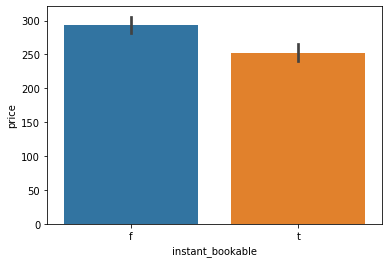

In [ ]:
sns.barplot(data=data, x='instant_bookable', y='price')

In [ ]:
data2.corr()['price']

index                                           0.141806
host_is_superhost                               0.053868
host_listings_count                             0.022559
host_total_listings_count                       0.026227
host_identity_verified                          0.038191
latitude                                        0.032266
longitude                                      -0.152899
accommodates                                    0.684927
bedrooms                                        0.702219
beds                                            0.551377
amenities                                       0.246717
price                                           1.000000
minimum_nights                                 -0.130973
maximum_nights                                 -0.050859
minimum_minimum_nights                         -0.098226
maximum_minimum_nights                         -0.013725
minimum_maximum_nights                          0.011718
maximum_maximum_nights         

<h1> XGBoost Regression </h1>

In [ ]:
!pip3 install xgboost
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data2['price'].head()

0    5.023881
1    4.317488
2    4.828314
3    5.241747
4    4.442651
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=905)
for train_index, test_index in split.split(data2, data2["neighbourhood_cleansed"]):
    strat_train_set = data2.loc[train_index]
    strat_test_set = data2.loc[test_index]
    
X2_train = strat_train_set[['longitude', 'latitude', 'accommodates', 'beds', 'bedrooms','availability_30', 'overall_review','amenities','instant_bookable','room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'host_is_superhost','has_availability', 'no_bathrooms' ]]
y2_train = strat_train_set[['price']]

X2_test = strat_test_set[['longitude', 'latitude', 'accommodates', 'beds', 'bedrooms','availability_30', 'overall_review','amenities','instant_bookable','room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'host_is_superhost','has_availability', 'no_bathrooms' ]]
y2_test = strat_test_set[['price']]

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [ ]:
model.fit(X2_train, y2_train)

[13:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred_xg = model.predict(X2_test)

<h1> XGBoost MSE,  cross validation </h1>

In [ ]:
mean_squared_error(y2_test, y_pred_xg)

0.20596957010342765

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y2_test, y_pred_xg))
print("RMSE: %f" % (rmse))


#Accuracy
#Accuracy score is only for classification problems.
#For regression problems you can use: R2 Score, MSE (Mean Squared Error), RMSE (Root Mean Squared Error).


#KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(model, X2_train, y2_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

RMSE: 0.453839
[13:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated

<h1> Random Forest Regression </h1>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X2_train, y2_train)  
predictions_rf = rf.predict(X2_test)

#errors = abs(predictions_rf - predictions_rf)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2))

<ipython-input-141-81f275fddad2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X2_train, y2_train)


<h1> Random Forest Regression MSE, cross validation </h1>

In [ ]:
#mse
m= mean_squared_error(y2_test, predictions_rf)
print('MSE: ', m)


#KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# CV model
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(rf, X2_train, y2_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

MSE:  0.18793951943422285


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy: 74.25% (1.82%)


<h1> Tuning hyperparameters </h1>

<h1> Grid search for XGBoost regression </h1>

In [ ]:
#https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663
from sklearn.model_selection import GridSearchCV

X2_train = strat_train_set[['longitude', 'latitude', 'accommodates', 'beds', 'bedrooms','availability_30', 'overall_review','amenities','instant_bookable','room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'host_is_superhost','has_availability', 'no_bathrooms' ]]
y2_train = strat_train_set[['price']]
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X2_train, y2_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[13:47:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:51] WARNING: /workspace/src/objective/regr

<h1> Random & Grid search for Random Forest regression </h1>

In [ ]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X2_train, y2_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [ ]:
def evaluate(model, X2_test, y2_test):
    predictions = model.predict(X2_test)
    errors = abs(predictions - y2_test)
    mape = 100 * np.mean(errors / y2_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X2_train, y2_train)
base_accuracy = evaluate(base_model, X2_test, y2_test)

<ipython-input-148-927984d34bdf>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(X2_train, y2_train)


ValueError: ignored